In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
from torch import Tensor, float32, uint8
from torchvision import transforms
import numpy as np
from os import getcwd
from os.path import join

#### Load original and enhanced image

In [ ]:
rgb_input_img: np.ndarray = cv.imread(join(getcwd(), "images", "strip1", "23744_022252959_200.tif"), cv.IMREAD_COLOR_RGB)
hsv_input_img: np.ndarray = cv.cvtColor(rgb_input_img, cv.COLOR_RGB2HSV)

rgb_output_img: np.ndarray = cv.imread(join(getcwd(), "images", "strip1", "output", "2048_23744_022252959_200.tif"), cv.IMREAD_COLOR_RGB)
hsv_output_img: np.ndarray = cv.imread(join(getcwd(), "images", "strip1", "output", "2048_hsv_23744_022252959_200.tif"), cv.IMREAD_COLOR_RGB)
hsv_output_img = cv.cvtColor(hsv_output_img, cv.COLOR_RGB2HSV)

#### Display RGB channels separately

In [ ]:
def display_rgb_channels(img: np.ndarray, fig_title: str, ylim: int) -> None:
    fig, subplots = plt.subplots(nrows=2, ncols=3, figsize=((30, 20)), layout="constrained")

    for i, color_channel in enumerate(["Red", "Green", "Blue"]):
        # Set 'vmin' and 'vmax' manually so that colorbar is in range [0..255]. Otherwise the same color
        # could be used for different values depending on the min and max pixel intensity of the image.
        # https://stackoverflow.com/a/3376734
        color_bar = subplots[0, i].imshow(img[..., i], cmap="viridis", vmin=0, vmax=255)
        subplots[0, i].axis("off")
        subplots[0, i].set_title(f"{color_channel} Color Channel")
        # unique, counts = np.unique(img[..., i], return_counts=True)
        # subplots[1, i].bar(unique, counts)
        subplots[1, i].hist(img[..., i].flatten(), bins=256, density=False, color=f"{color_channel.lower()}")
        subplots[1, i].set_xlabel("Pixel Intensity")
        subplots[1, i].set_ylabel("Number of Pixels")
        subplots[1, i].set_title(f"Pixel Intensity Distribution of {color_channel} Color Channel")
        subplots[1, i].set_ylim(top=ylim)
        
        if i == 2:
            fig.colorbar(color_bar, ax=subplots[0, i], shrink=0.7, label="Pixel Intensity")

    fig.suptitle(fig_title)
    plt.show()

##### Input Image

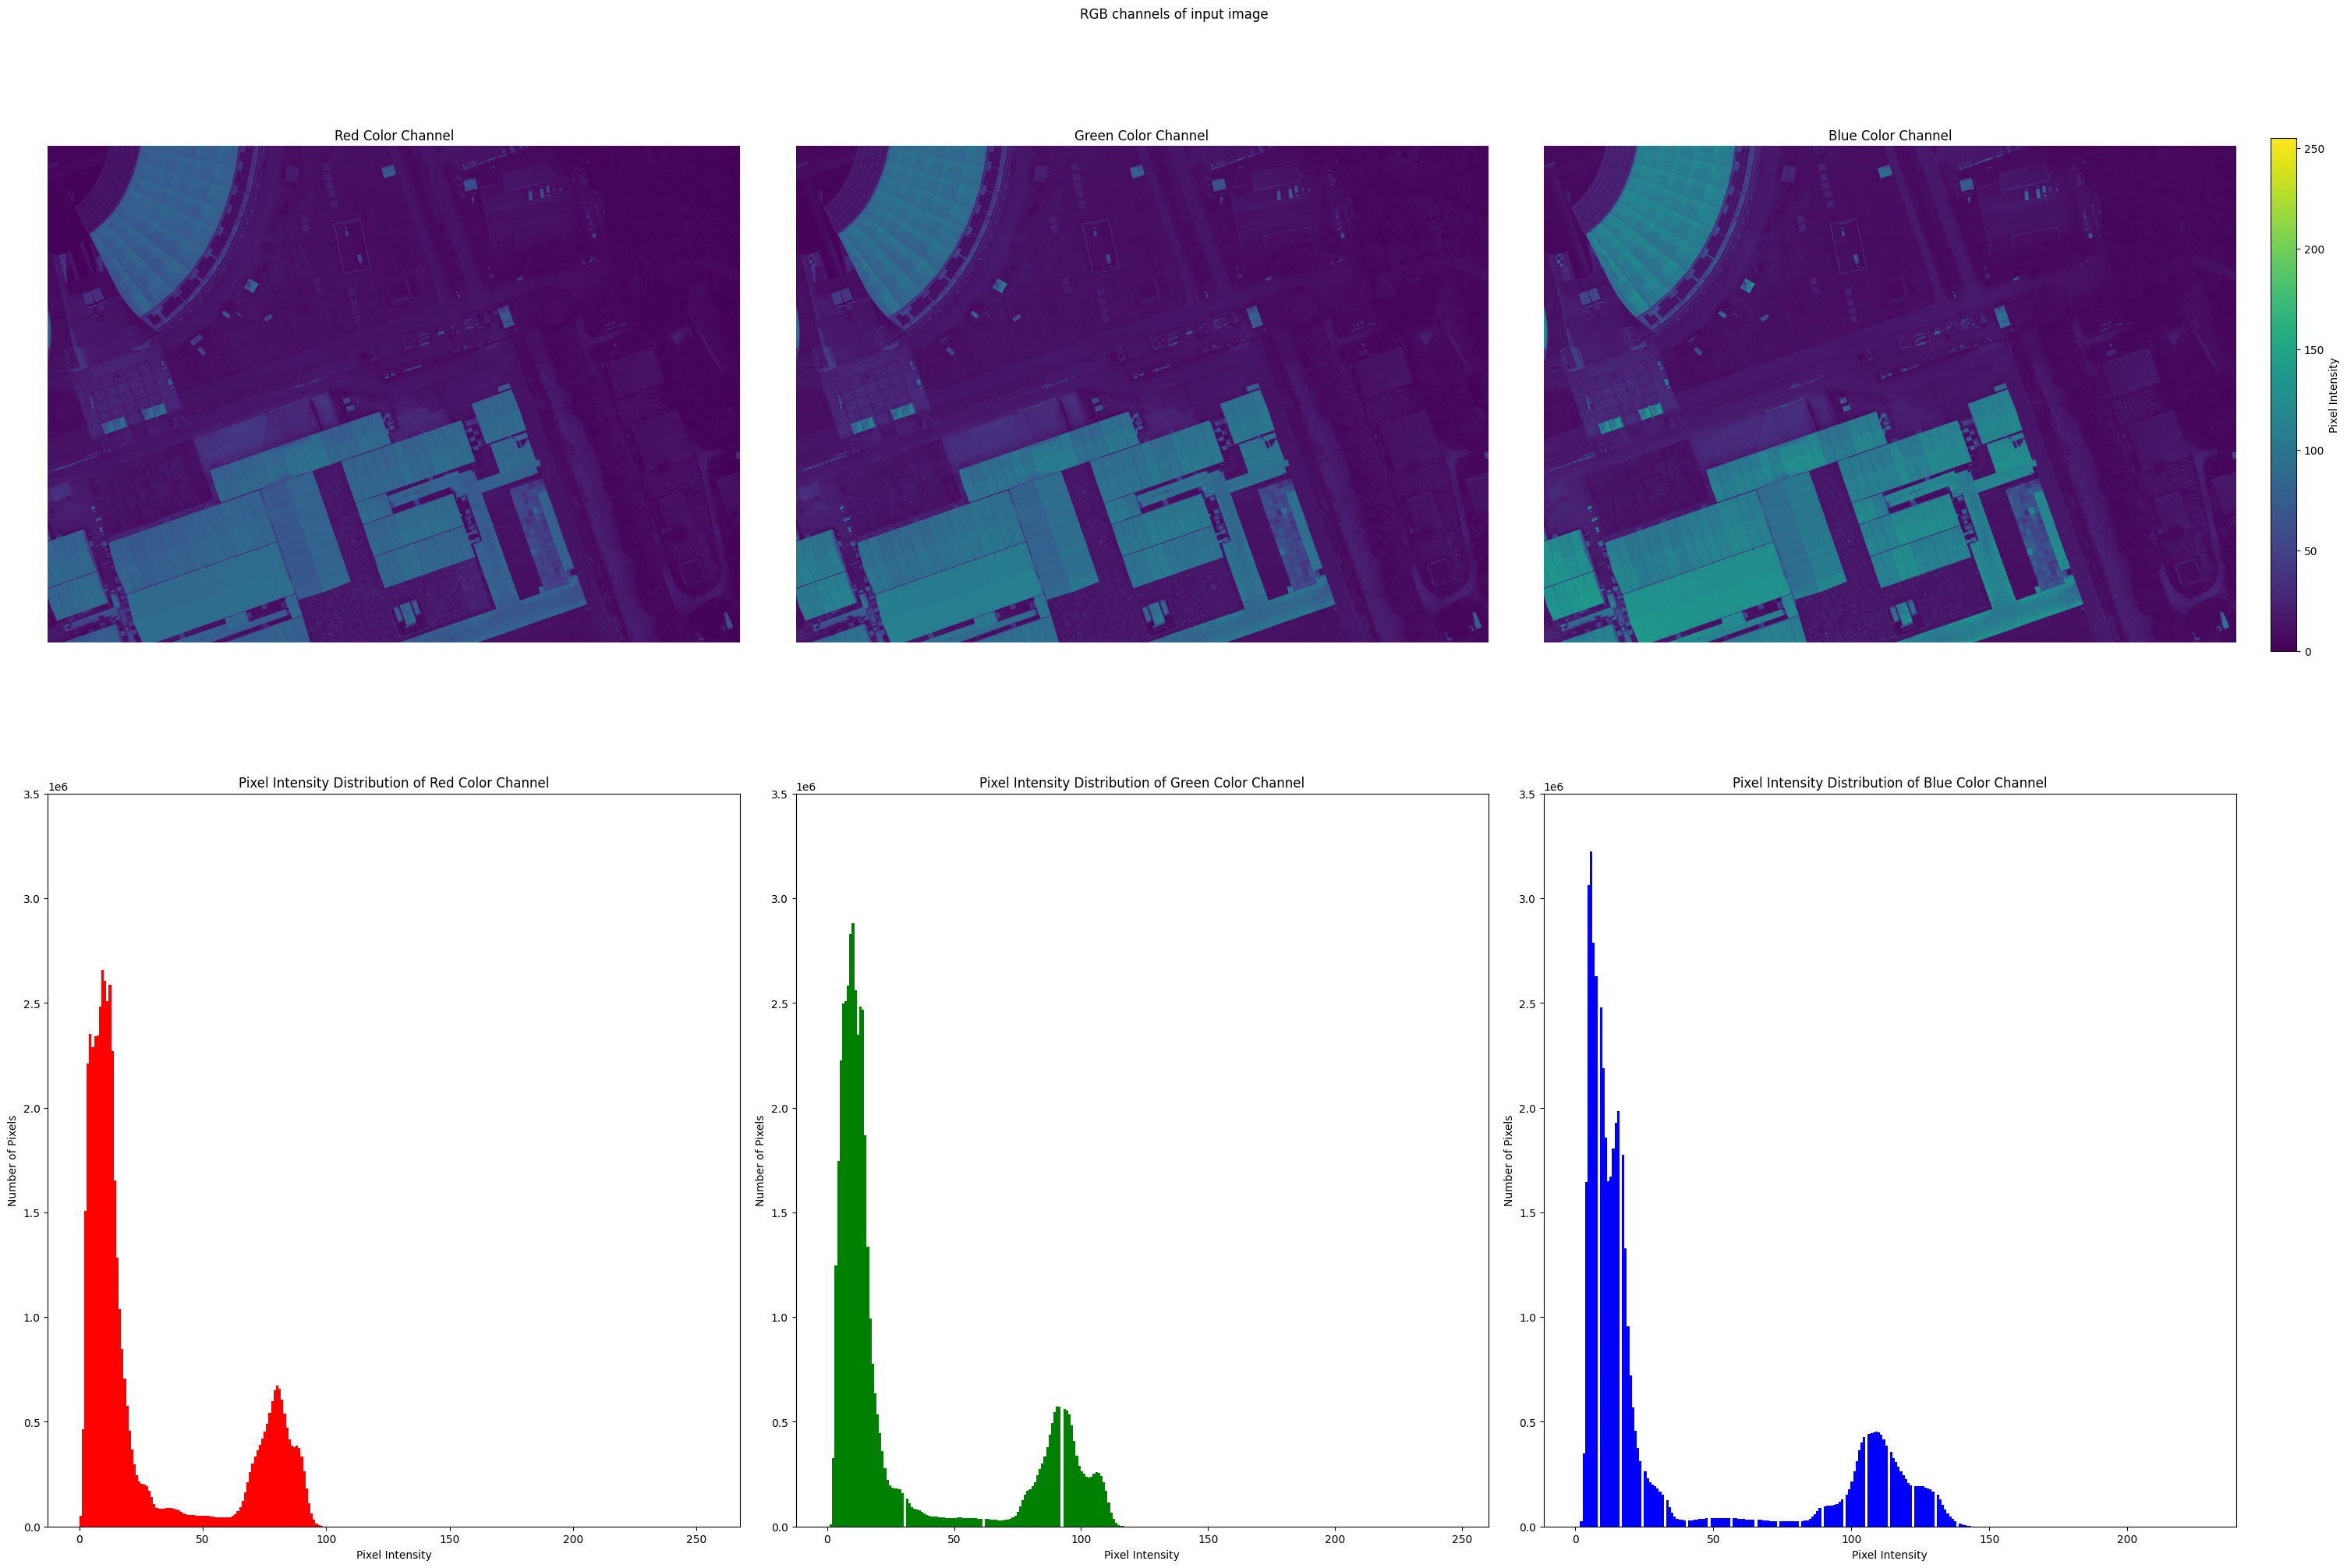

In [49]:
display_rgb_channels(rgb_input_img, "RGB channels of input image", 3.5e6)

##### Output Image

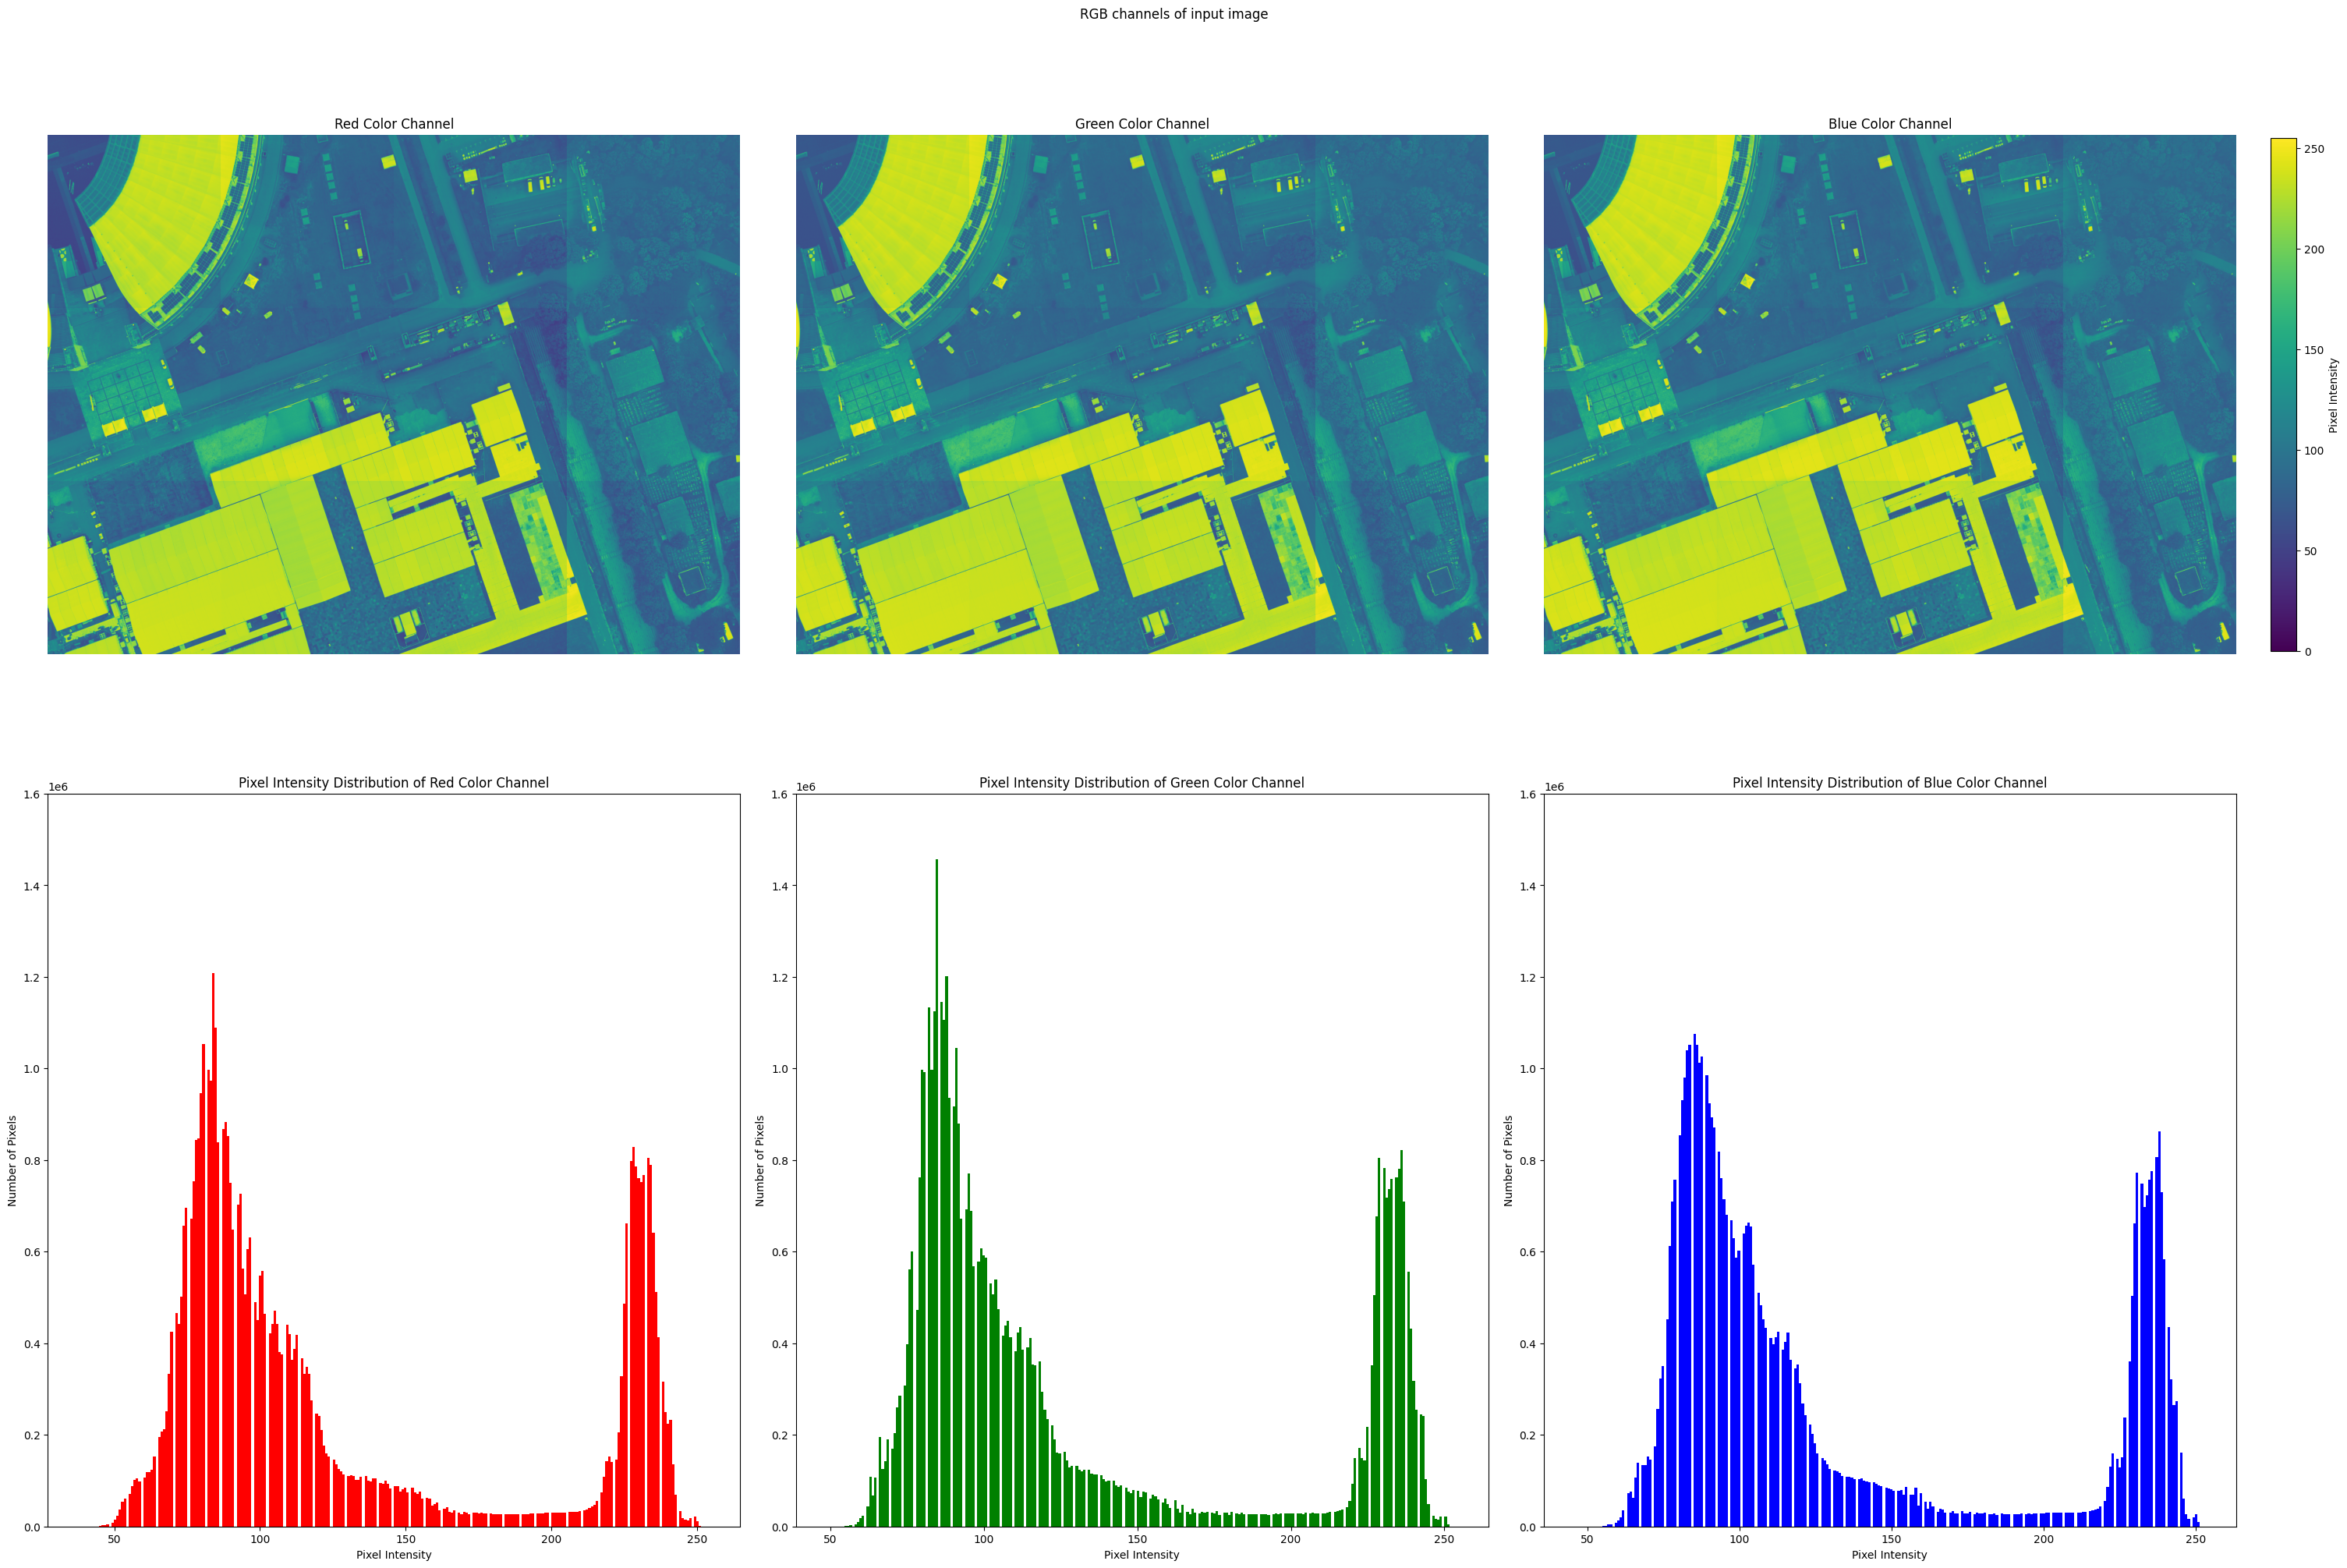

In [50]:
display_rgb_channels(rgb_output_img, "RGB channels of input image", 1.6e6)

#### Display Value Channel of HSV converted images

In [51]:
def display_v_channel(input_img: np.ndarray, output_img: np.ndarray) -> None:
    fig, subplots = plt.subplots(nrows=2, ncols=2, figsize=((20, 15)), layout="constrained")

    def display(img: np.ndarray, subplot, image_name: str) -> None:
        v_channel = img[..., 2]
        color_bar = subplot[0].imshow(v_channel, cmap="viridis", vmin=0, vmax=255)
        subplot[0].axis("off")
        subplot[0].set_title(image_name)
        # unique, counts = np.unique(v_channel, return_counts=True)
        # subplot[1].bar(unique, counts)
        subplot[1].hist(v_channel.flatten(), bins=256, density=False)
        subplot[1].set_xlabel("Pixel Intensity")
        subplot[1].set_ylabel("Number of Pixels")
        subplot[1].set_title(f"Pixel Intensity Distribution of {image_name}")
        subplot[1].set_ylim(top=3e6)

        fig.colorbar(color_bar, ax=subplot[0], shrink=0.85, label="Pixel Intensity")

    display(input_img, subplots[:, 0], "Input Image")
    display(output_img, subplots[:, 1], "Output Image")

    fig.suptitle("Difference in Pixel Intensity of Value-Channel")

    plt.show()

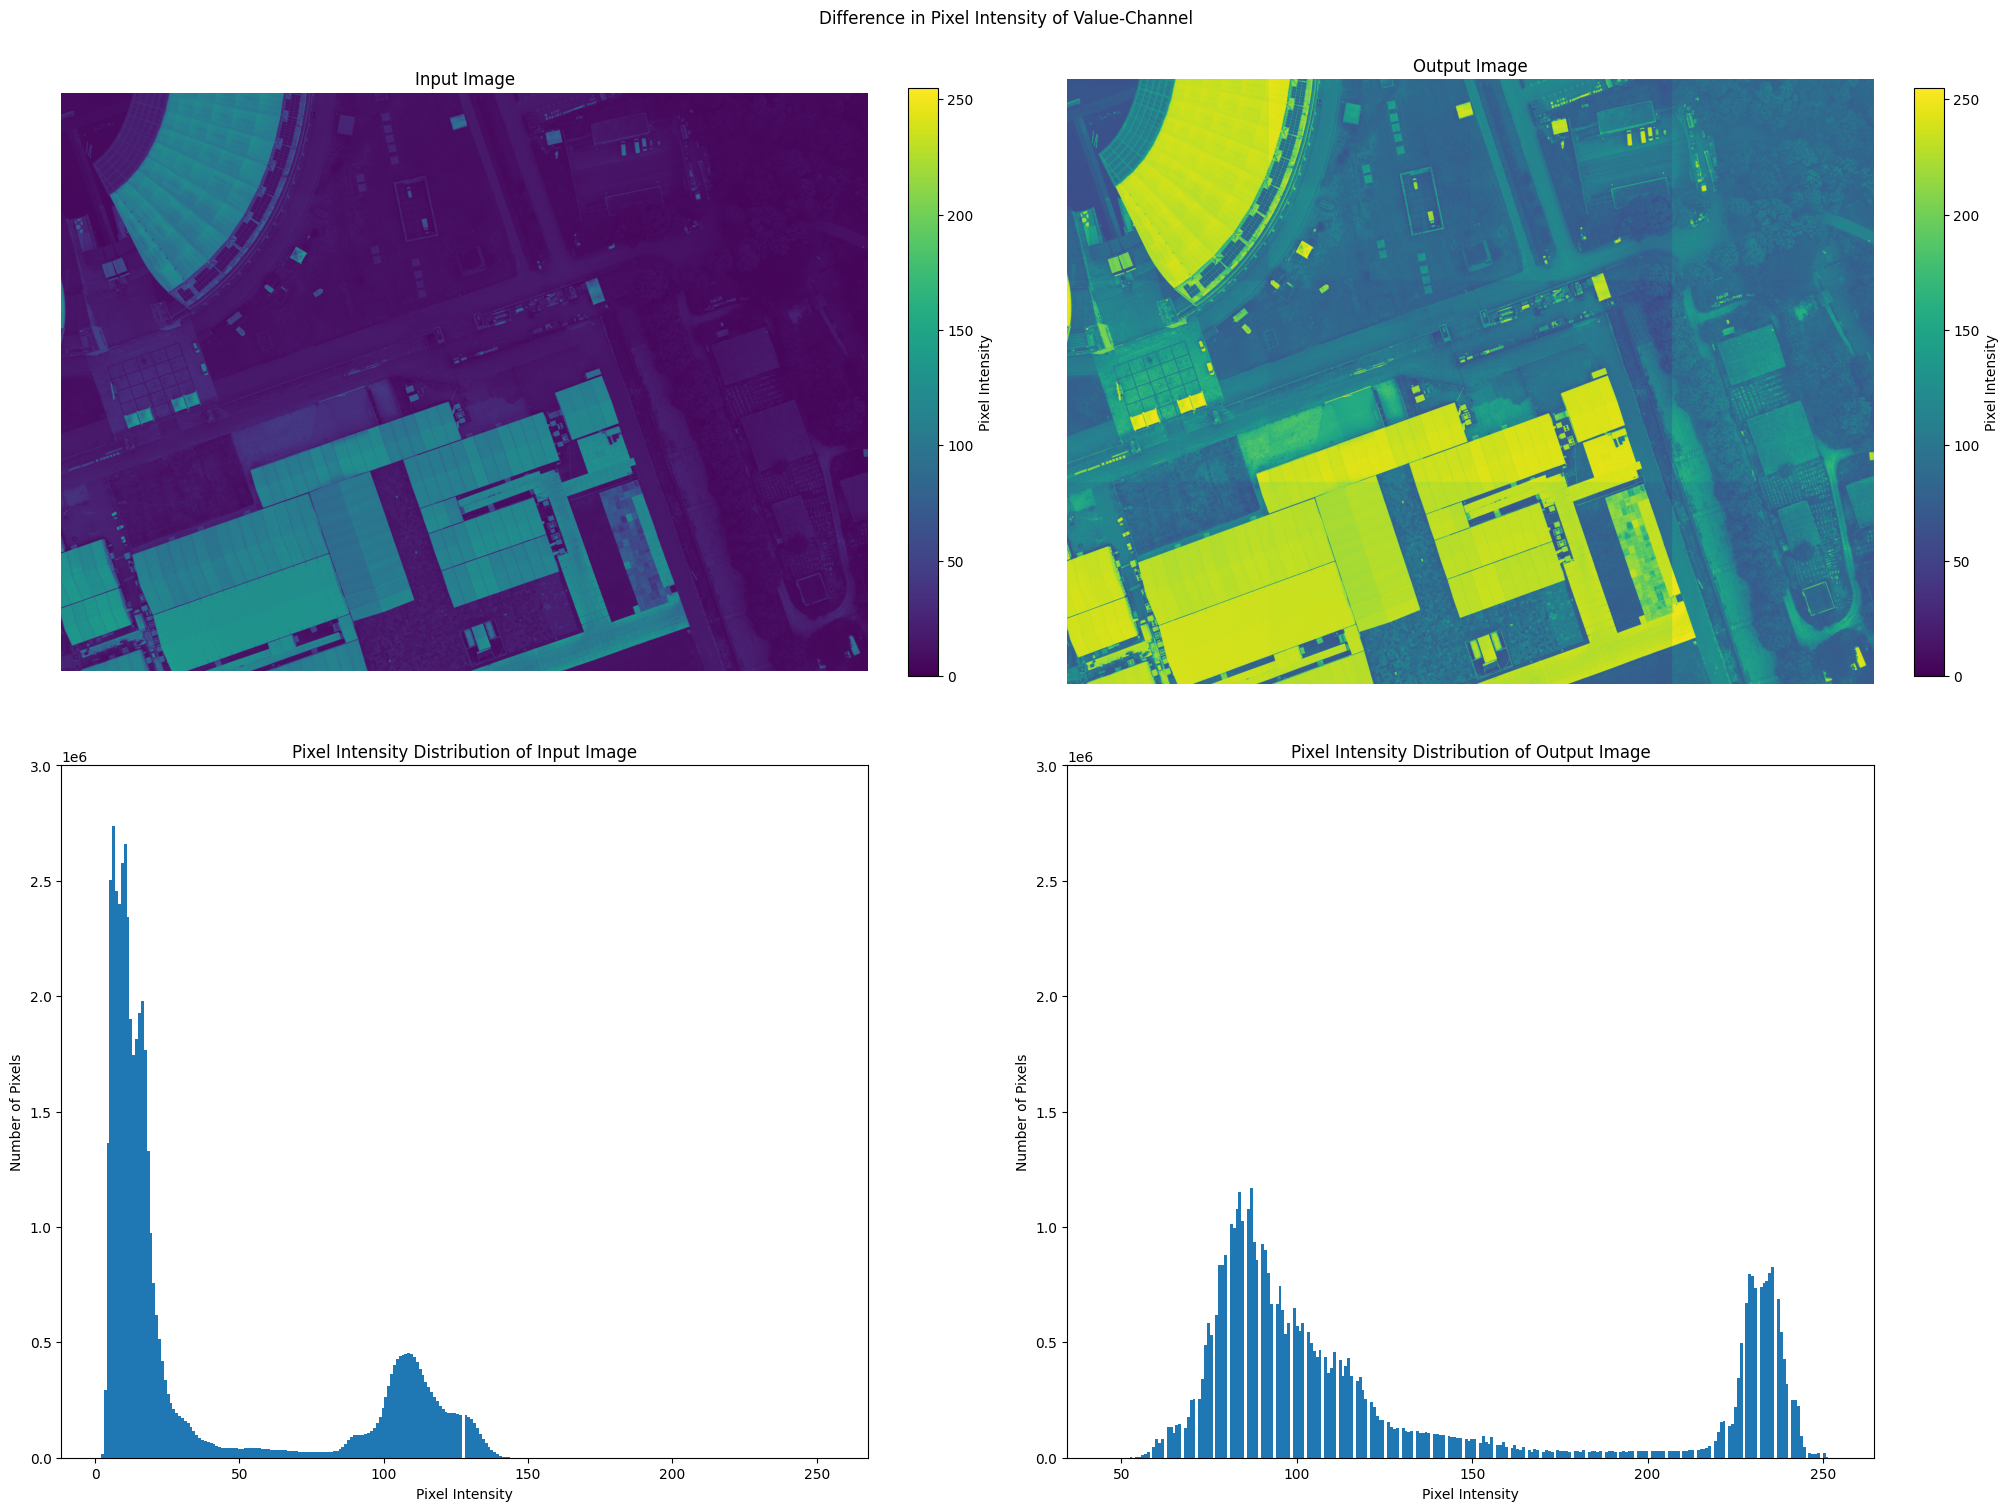

In [52]:
display_v_channel(hsv_input_img, hsv_output_img)

#### Comparing the averaged RGB channel values to the V channel of HSV

In [33]:
def compare_rgb_to_hsv(
    rgb_input: np.ndarray,
    hsv_input: np.ndarray,
    rgb_output: np.ndarray,
    hsv_output: np.ndarray
) -> None:
    figure, subplots = plt.subplots(nrows=2, ncols=2, figsize=((20, 10)), layout="constrained")

    def display(subplot, rgb_image: np.ndarray, hsv_image: np.ndarray, image_name: str, ylim: int) -> None:
        # https://stackoverflow.com/a/67387058
        subplot[0].hist(rgb_image[..., 0].flatten(), bins=256, density=False, alpha=0.5, color="red")
        subplot[0].hist(rgb_image[..., 1].flatten(), bins=256, density=False, alpha=0.4, color="green")
        subplot[0].hist(rgb_image[..., 2].flatten(), bins=256, density=False, alpha=0.3, color="blue")
        subplot[0].set_ylim(top=ylim)
        subplot[1].hist(hsv_image[..., 2].flatten(), bins=256, density=False)
        subplot[1].set_xlabel("Pixel Intensity")
        subplot[1].set_ylabel("Number of Pixels")
        subplot[1].set_title(f"Pixel Intensity Distribution of V Channel of {image_name}")
        subplot[1].set_ylim(top=ylim)

    display(subplots[:, 0], rgb_input, hsv_input, "Input Image", 3.5e6)
    display(subplots[:, 1], rgb_output, hsv_output, "Output Image", 1.6e6)

    figure.suptitle("Comparison of Pixel Intensity Distribution of RGB Channels and V Channel")
    
    plt.show()

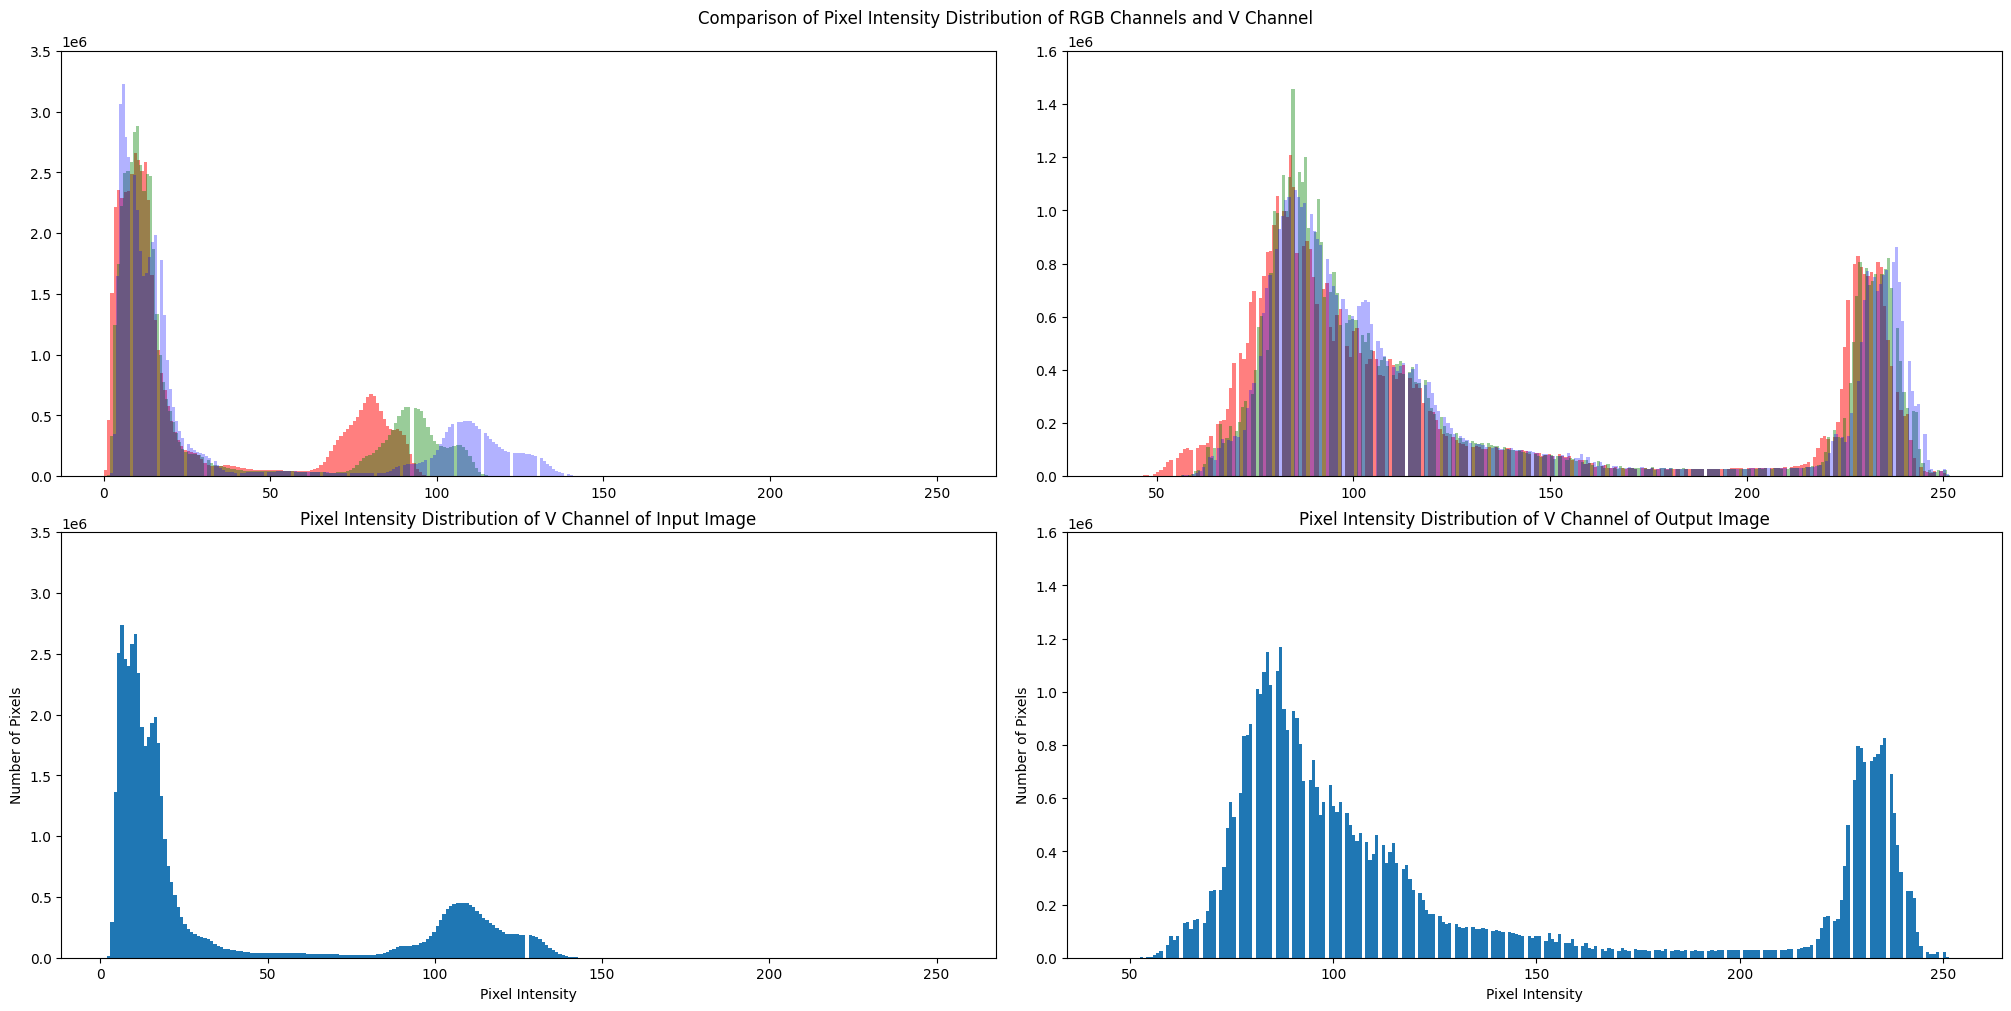

In [34]:
compare_rgb_to_hsv(rgb_input_img, hsv_input_img, rgb_output_img, hsv_output_img)